In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv



--- Logistic_Regression Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



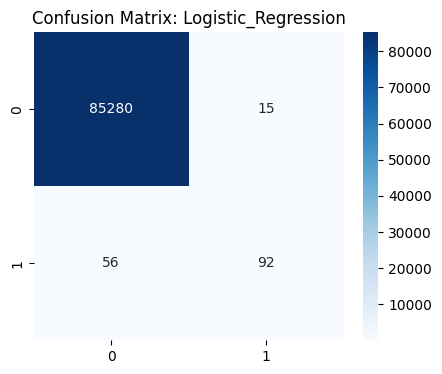

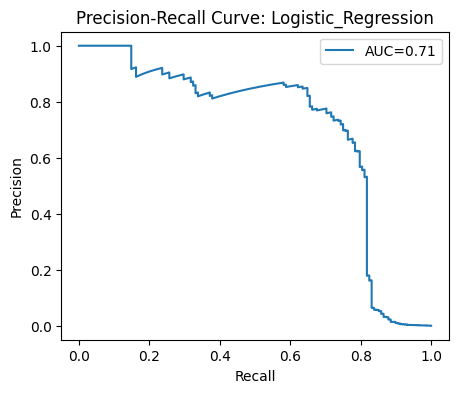


--- Random_Forest Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



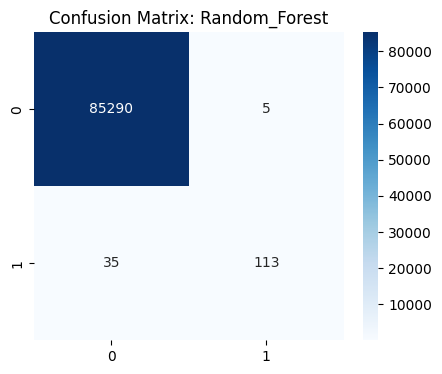

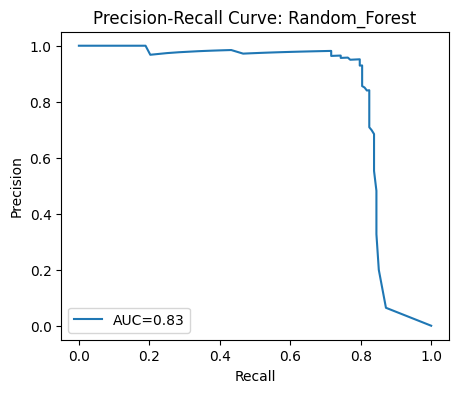

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# 1. LOAD DATA
# Using your specific directory path
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# 2. PREPROCESSING (Crucial for Methodology Section)
# Scaling 'Amount' to match PCA features. Dropping 'Time' as it's often noisy.
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)

# 3. STRATIFIED SPLIT (Essential for Imbalanced Data)
# This ensures both Train and Test sets have the same % of fraud.
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. TRAIN MODELS
# Model A: Logistic Regression (The Baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)[:, 1]

# Model B: Random Forest (The Advanced Ensemble)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

# 5. EVALUATION & SAVING VISUALS FOR WORD DOC
def evaluate_and_save(y_test, preds, probs, name):
    print(f"\n--- {name} Results ---")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.savefig(f'/kaggle/working/{name}_cm.png') # Saves to your output folder
    plt.show()

    # Precision-Recall Curve (Higher marks than just Accuracy)
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, label=f'AUC={auc(recall, precision):.2f}')
    plt.title(f'Precision-Recall Curve: {name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.savefig(f'/kaggle/working/{name}_prc.png')
    plt.show()

evaluate_and_save(y_test, lr_preds, lr_probs, "Logistic_Regression")
evaluate_and_save(y_test, rf_preds, rf_probs, "Random_Forest")